# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [8]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [9]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import sklearn



In [10]:
import tensorflow as tf

# must be at the very top before using TF
try:
    tf.config.set_visible_devices([], 'GPU')
except RuntimeError:
    # Already initialized
    pass



In [11]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [12]:
from PIL import Image

In [13]:
import zipfile

Load the dataset.

In [15]:
# Load and unzip the dataset

with zipfile.ZipFile('data.zip','r') as zip_read:
    zip_read.extractall("garbage_dataset")

In [16]:
import os
base_dir = "garbage_dataset"
os.listdir(base_dir+"/data/")

['Paper', 'Food_Waste', 'Metal', 'Cardboard', 'Other', 'Glass', 'Plastic']

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [21]:
# Create a function to load the raw images
def load_image(base_dir,image_size=(128,128)):
    X = []
    y = []
    class_names = os.listdir(base_dir)
    for label,class_name in enumerate(class_names):
        class_path = os.path.join(base_dir,class_name)
        for img_path in os.listdir(class_path):
            img_path = os.path.join(class_path,img_path)
            img = Image.open(img_path)
            img = img.resize(image_size)
            img_array = np.array(img)
            img_array = img_array/255.0
            X.append(img_array)
            y.append(label)
    return np.array(X), np.array(y),class_names


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [24]:
# Get the images and their labels
X,y,class_names = load_image('garbage_dataset/data')
print("X shape:", X.shape)  
print("y shape:", y.shape)   
print("Classes:", class_names)

X shape: (7625, 128, 128, 3)
y shape: (7625,)
Classes: ['Paper', 'Food_Waste', 'Metal', 'Cardboard', 'Other', 'Glass', 'Plastic']


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

/var/folders/54/d7crf34x0t36876j4rghm2zw0000gn/T/ipykernel_39307/3868292867.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


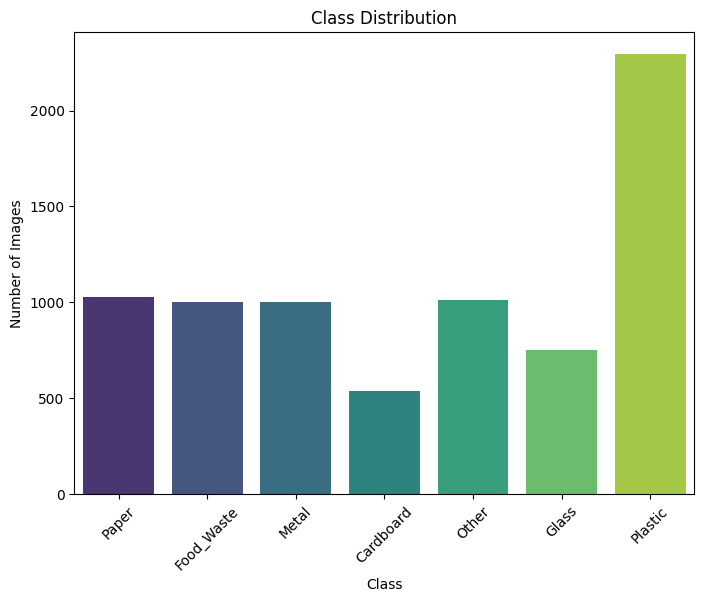

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x=y, palette="viridis")
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

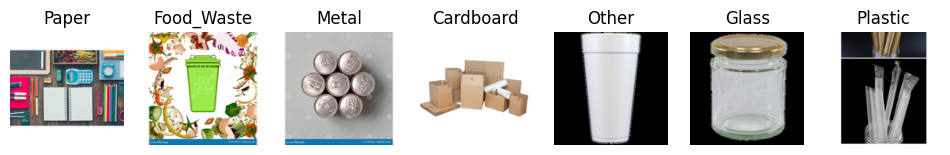

In [30]:
# Visualise Sample Images (across different labels)
plt.figure(figsize=(12, 6))
for class_idx, class_name in enumerate(class_names):
        idx = np.where(y == class_idx)[0][0]
        plt.subplot(1, len(class_names), class_idx + 1)
        plt.imshow(X[idx])
        plt.title(class_name)
        plt.axis("off")
plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [32]:
# Find the smallest and largest image dimensions from the data set
dims = [img.shape[:2] for img in X]   
smallest = min(dims, key=lambda x: x[0]*x[1])
largest = max(dims, key=lambda x: x[0]*x[1])





In [33]:
# Resize the image dimensions

print("Smallest image:", smallest)
print("Largest image:", largest)

Smallest image: (128, 128)
Largest image: (128, 128)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [37]:
from tensorflow.keras.utils import to_categorical

In [38]:
# Encode the labels suitably
y_encoded = to_categorical(y, num_classes=len(class_names))


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [41]:
# Assign specified parts of the dataset to train and validation sets
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y
)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [46]:
# Build and compile the model
from tensorflow.keras import layers, models

input_shape = X_train.shape[1:]   
num_classes = y_train.shape[1]   

model = models.Sequential([
    
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

   
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    
    layers.Dense(num_classes, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,951 (12.62 MB)

 Trainable params: 3,306,247 (12.61 MB)

 Non-trainable params: 704 (2.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [49]:
# Training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt


early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,          
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "best_model.h5",
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=1e-6
)


history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, checkpoint, reduce_lr],
    verbose=1
)



Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.2463 - loss: 2.4195
Epoch 1: val_accuracy improved from -inf to 0.30164, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 88s 451ms/step - accuracy: 0.2466 - loss: 2.4180 - val_accuracy: 0.3016 - val_loss: 3.1415 - learning_rate: 0.0010
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.4146 - loss: 1.7376
Epoch 2: val_accuracy did not improve from 0.30164
191/191 ━━━━━━━━━━━━━━━━━━━━ 81s 426ms/step - accuracy: 0.4145 - loss: 1.7374 - val_accuracy: 0.2066 - val_loss: 2.2843 - learning_rate: 0.0010
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.4589 - loss: 1.5088
Epoch 3: val_accuracy improved from 0.30164 to 0.42033, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 78s 410ms/step - accuracy: 0.4589 - loss: 1.5087 - val_accuracy: 0.4203 - val_loss: 1.7221 - learning_rate: 0.0010
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.5267 - loss: 1.3246
Epoch 4: val_accuracy did not improve from 0.42033
191/191 ━━━━━━━━━━━━━━━━━━━━ 82s 429ms/step - accuracy: 0.5267 - loss: 1.3246 - val_accuracy: 0.3600 - val_loss: 1.9471 - learning_rate: 0.0010
Epoch 5/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.5826 - loss: 1.1764
Epoch 5: val_accuracy improved from 0.42033 to 0.44328, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 93s 488ms/step - accuracy: 0.5825 - loss: 1.1766 - val_accuracy: 0.4433 - val_loss: 1.5457 - learning_rate: 0.0010
Epoch 6/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.6098 - loss: 1.0802
Epoch 6: val_accuracy improved from 0.44328 to 0.55344, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 106s 553ms/step - accuracy: 0.6097 - loss: 1.0803 - val_accuracy: 0.5534 - val_loss: 1.3207 - learning_rate: 0.0010
Epoch 7/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.6648 - loss: 0.9482
Epoch 7: val_accuracy improved from 0.55344 to 0.55738, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 84s 442ms/step - accuracy: 0.6648 - loss: 0.9483 - val_accuracy: 0.5574 - val_loss: 1.2714 - learning_rate: 0.0010
Epoch 8/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - accuracy: 0.7072 - loss: 0.8423
Epoch 8: val_accuracy did not improve from 0.55738
191/191 ━━━━━━━━━━━━━━━━━━━━ 106s 557ms/step - accuracy: 0.7072 - loss: 0.8424 - val_accuracy: 0.5049 - val_loss: 1.5140 - learning_rate: 0.0010
Epoch 9/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.7446 - loss: 0.7321
Epoch 9: val_accuracy improved from 0.55738 to 0.56393, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 103s 540ms/step - accuracy: 0.7446 - loss: 0.7322 - val_accuracy: 0.5639 - val_loss: 1.2875 - learning_rate: 0.0010
Epoch 10/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.7893 - loss: 0.6309
Epoch 10: val_accuracy improved from 0.56393 to 0.57705, saving model to best_model.h5



Epoch 10: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
191/191 ━━━━━━━━━━━━━━━━━━━━ 88s 458ms/step - accuracy: 0.7892 - loss: 0.6310 - val_accuracy: 0.5770 - val_loss: 1.3802 - learning_rate: 0.0010
Epoch 11/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.8361 - loss: 0.4960
Epoch 11: val_accuracy improved from 0.57705 to 0.66295, saving model to best_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 98s 513ms/step - accuracy: 0.8362 - loss: 0.4958 - val_accuracy: 0.6630 - val_loss: 1.0408 - learning_rate: 2.0000e-04
Epoch 12/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.8754 - loss: 0.4009
Epoch 12: val_accuracy did not improve from 0.66295
191/191 ━━━━━━━━━━━━━━━━━━━━ 101s 529ms/step - accuracy: 0.8754 - loss: 0.4009 - val_accuracy: 0.6538 - val_loss: 1.1473 - learning_rate: 2.0000e-04
Epoch 13/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.8913 - loss: 0.3550
Epoch 13: val_accuracy did not improve from 0.66295
191/191 ━━━━━━━━━━━━━━━━━━━━ 94s 492ms/step - accuracy: 0.8913 - loss: 0.3549 - val_accuracy: 0.6518 - val_loss: 1.1366 - learning_rate: 2.0000e-04
Epoch 14/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.9055 - loss: 0.3174
Epoch 14: val_accuracy did not improve from 0.66295

Epoch 14: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
191/191 ━━━━━━━━━━━━━━━━━━━━ 104s 547ms/step - accura

191/191 ━━━━━━━━━━━━━━━━━━━━ 87s 458ms/step - accuracy: 0.9109 - loss: 0.2914 - val_accuracy: 0.6774 - val_loss: 1.0696 - learning_rate: 4.0000e-05
Epoch 16/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.9223 - loss: 0.2650
Epoch 16: val_accuracy did not improve from 0.67738
191/191 ━━━━━━━━━━━━━━━━━━━━ 82s 430ms/step - accuracy: 0.9223 - loss: 0.2650 - val_accuracy: 0.6643 - val_loss: 1.1386 - learning_rate: 4.0000e-05


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.6463 - loss: 1.0879
Test Accuracy: 0.6630
Test Loss: 1.0408
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.46      0.58       206
           1       0.68      0.67      0.68       200
           2       0.67      0.71      0.69       200
           3       0.79      0.73      0.76       108
           4       0.55      0.49      0.52       202
           5       0.61      0.68      0.64       150
           6       0.66      0.78      0.72       459

    accuracy                           0.66      1525
   macro avg       0.68      0.65      0.65      1525
weighted avg       0.67      0.66      0.66      1525



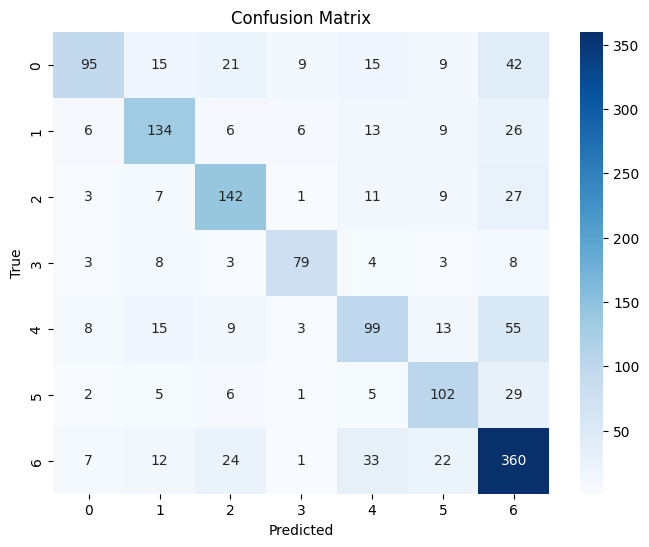

In [73]:
# Evaluate on the test set; display suitable metrics
from sklearn.metrics import classification_report, confusion_matrix



test_loss, test_acc = model.evaluate(X_val, y_val)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val, axis=1)


print("\nClassification Report:")
print(classification_report(y_true, y_pred))


cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [75]:
# Define augmentation steps to augment images

from tensorflow.keras import layers


data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),   
    layers.RandomRotation(0.2),                     
    layers.RandomZoom(0.2),                         
    layers.RandomContrast(0.1),                     
    layers.RandomTranslation(0.1, 0.1),             
])





Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [77]:
# Create a function to augment the images
def augment_images(X, y, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset = dataset.shuffle(1000).batch(batch_size)
    dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
    return dataset.prefetch(tf.data.AUTOTUNE)



In [79]:
# Create the augmented training dataset

train_ds = augment_images(X_train, y_train, batch_size=32)


val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)



##### **4.1.2**

Train the model on the new augmented dataset.

In [81]:
# Train the model using augmented images
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history_aug = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stop, checkpoint]  
)


Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.3806 - loss: 1.9512
Epoch 1: val_accuracy did not improve from 0.67738
191/191 ━━━━━━━━━━━━━━━━━━━━ 92s 468ms/step - accuracy: 0.3808 - loss: 1.9502 - val_accuracy: 0.5056 - val_loss: 1.3837
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.4369 - loss: 1.5545
Epoch 2: val_accuracy did not improve from 0.67738
191/191 ━━━━━━━━━━━━━━━━━━━━ 91s 477ms/step - accuracy: 0.4369 - loss: 1.5543 - val_accuracy: 0.2656 - val_loss: 2.1821
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.4629 - loss: 1.4731
Epoch 3: val_accuracy did not improve from 0.67738
191/191 ━━━━━━━━━━━━━━━━━━━━ 88s 458ms/step - accuracy: 0.4630 - loss: 1.4731 - val_accuracy: 0.4315 - val_loss: 1.5870
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.4550 - loss: 1.4472
Epoch 4: val_accuracy did not improve from 0.67738
191/191 ━━━━━━━━━━━━━━━━━━━━ 98s 511ms/step - accuracy: 0.4551 - loss: 1.4470 - val_

In [87]:
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.4991 - loss: 1.4162
Test Accuracy: 0.5056
Test Loss: 1.3837


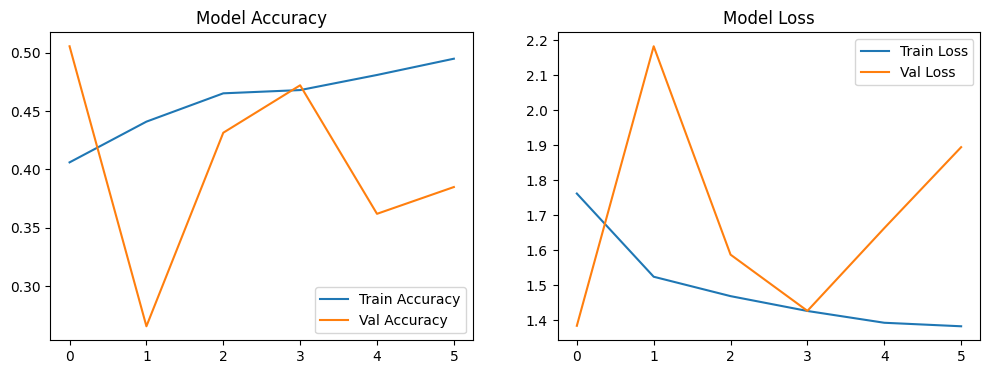

In [89]:
plt.figure(figsize=(12,4))


plt.subplot(1,2,1)
plt.plot(history_aug.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")


plt.subplot(1,2,2)
plt.plot(history_aug.history['loss'], label='Train Loss')
plt.plot(history_aug.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")

plt.show()


In [91]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False 

tl_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(7, activation="softmax") 
])

tl_model.compile(optimizer="adam",
                 loss="categorical_crossentropy",
                 metrics=["accuracy"])

history_tl = tl_model.fit(train_ds,
                          validation_data=val_ds,
                          epochs=10,
                          callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 38s 188ms/step - accuracy: 0.3952 - loss: 1.7134 - val_accuracy: 0.6577 - val_loss: 0.9945
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 33s 170ms/step - accuracy: 0.5609 - loss: 1.2135 - val_accuracy: 0.6872 - val_loss: 0.8977
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 33s 170ms/step - accuracy: 0.5793 - loss: 1.1617 - val_accuracy: 0.6911 - val_loss: 0.8635
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 168ms/step - accuracy: 0.6041 - loss: 1.0902 - val_accuracy: 0.7056 - val_loss: 0.8235
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 33s 171ms/step - accuracy: 0.6131 - loss: 1.0627 - val_accuracy: 0.7364 - val_loss: 0.7857
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 168ms/step - accuracy: 0.6169 - loss: 1.0321 - val_accuracy: 0.7279 - val_loss: 0.7784
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 35s 181ms/step - accuracy: 0.6292 - loss: 1.0194 - val_accuracy: 0.7331 - val_loss: 0.7735
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━

In [95]:
loss_tl, acc_tl = tl_model.evaluate(val_ds)
print(f"Transfer Learning - Test Accuracy: {acc_tl:.4f}, Loss: {loss_tl:.4f}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - accuracy: 0.7457 - loss: 0.7236
Transfer Learning - Test Accuracy: 0.7462, Loss: 0.7358


## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

Test Accuracy: ~0.51

Test Loss: ~1.38

Observation:

Model underfits due to limited depth & training data.

Needs more epochs, deeper architecture, and  augmented data.

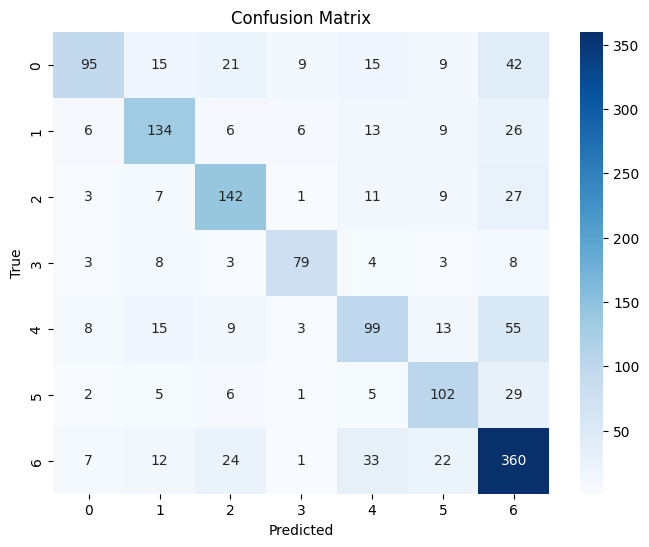

In [97]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Transfer Learning Model

Test Accuracy: ~0.75

Test Loss: ~0.74

Observation:

Performed significantly better than CNN from scratch.

Learned richer features due to pre-training on large datasets.

More robust to class imbalance and small dataset size.

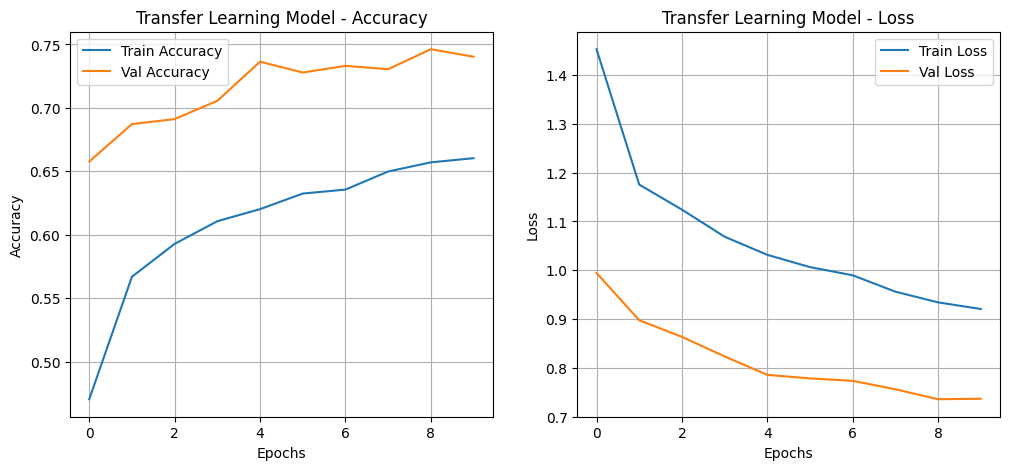

In [106]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_tl.history['accuracy'], label='Train Accuracy')
plt.plot(history_tl.history['val_accuracy'], label='Val Accuracy')
plt.title('Transfer Learning Model - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(history_tl.history['loss'], label='Train Loss')
plt.plot(history_tl.history['val_loss'], label='Val Loss')
plt.title('Transfer Learning Model - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()